In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/dataset_no_blind.csv')
blind_test = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')

In [3]:
scaler = StandardScaler()
scaler.fit(dataset[['RHOB','ILD_log10','NPHI']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
cv1 = KFold(n_splits=4, shuffle=True, random_state=42)

In [5]:
rForest = RandomForestRegressor(n_jobs=2, min_samples_leaf=20, max_depth=6, max_leaf_nodes=30)
params={'n_estimators':np.arange(1,101)}
rForestReg = GridSearchCV(rForest,params,scoring='neg_mean_squared_error', cv=cv1, return_train_score=True)
rForestReg.fit(scaler.transform(dataset[[ 'RHOB','ILD_log10','NPHI']]),dataset.DT)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=6, max_features='auto',
                                             max_leaf_nodes=30,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=20,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_j...
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  5

In [6]:
print(rForestReg.best_estimator_)
print(rForestReg.best_params_)
print(rForestReg.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=2,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
{'n_estimators': 19}
-18.06612624218048


In [7]:
df = pd.DataFrame(rForestReg.cv_results_)
df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
18,0.214684,0.021112,0.132969,0.035234,19,{'n_estimators': 19},-18.028041,-19.732551,-16.859281,-17.644632,-18.066126,1.050304,1,-16.972537,-16.410646,-16.935546,-16.994002,-16.828183,0.241970
84,1.025913,0.109869,0.117682,0.007391,85,{'n_estimators': 85},-18.000867,-19.683302,-17.058331,-17.536261,-18.069690,0.989428,2,-16.895905,-16.293621,-17.014926,-16.893234,-16.774422,0.281907
74,0.716359,0.014858,0.105207,0.001080,75,{'n_estimators': 75},-18.063937,-19.594643,-17.080005,-17.550908,-18.072373,0.945264,3,-16.894501,-16.327232,-17.038945,-16.888491,-16.787292,0.272360
81,0.919648,0.099241,0.105817,0.002704,82,{'n_estimators': 82},-18.149249,-19.660178,-16.970851,-17.545008,-18.081321,1.002270,4,-16.953452,-16.269605,-16.951285,-16.880556,-16.763725,0.286783
34,0.329272,0.016781,0.105301,0.002579,35,{'n_estimators': 35},-17.981277,-19.592712,-17.024363,-17.727620,-18.081493,0.940290,5,-16.882059,-16.334639,-16.963247,-17.015084,-16.798757,0.272121


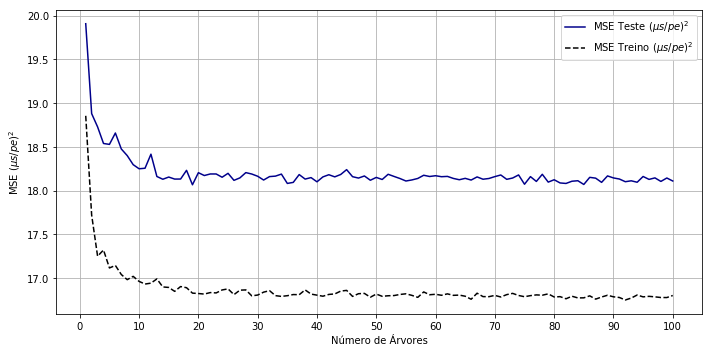

In [8]:
plt.figure(figsize = ((10,5)))
plt.plot(df.sort_values(by='param_n_estimators').param_n_estimators,
         -df.sort_values(by='param_n_estimators').mean_test_score,
        c='darkblue', label='MSE Teste $(\mu s/pe)^2$')
plt.plot(df.sort_values(by='param_n_estimators').param_n_estimators,
            -df.sort_values(by='param_n_estimators').mean_train_score,
        c='black', ls='--', label = 'MSE Treino $(\mu s/pe)^2$')

plt.legend()
plt.grid()
plt.xticks(np.arange(0,100+1,10))
plt.xlabel('Número de Árvores')
plt.ylabel('MSE $(\mu s/pe)^2$')

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

plt.tight_layout()

In [9]:
x_blindscale = scaler.transform(blind_test[['RHOB','ILD_log10','NPHI']])

In [10]:
blind_test['DT_r_forest'] = rForestReg.predict(x_blindscale)

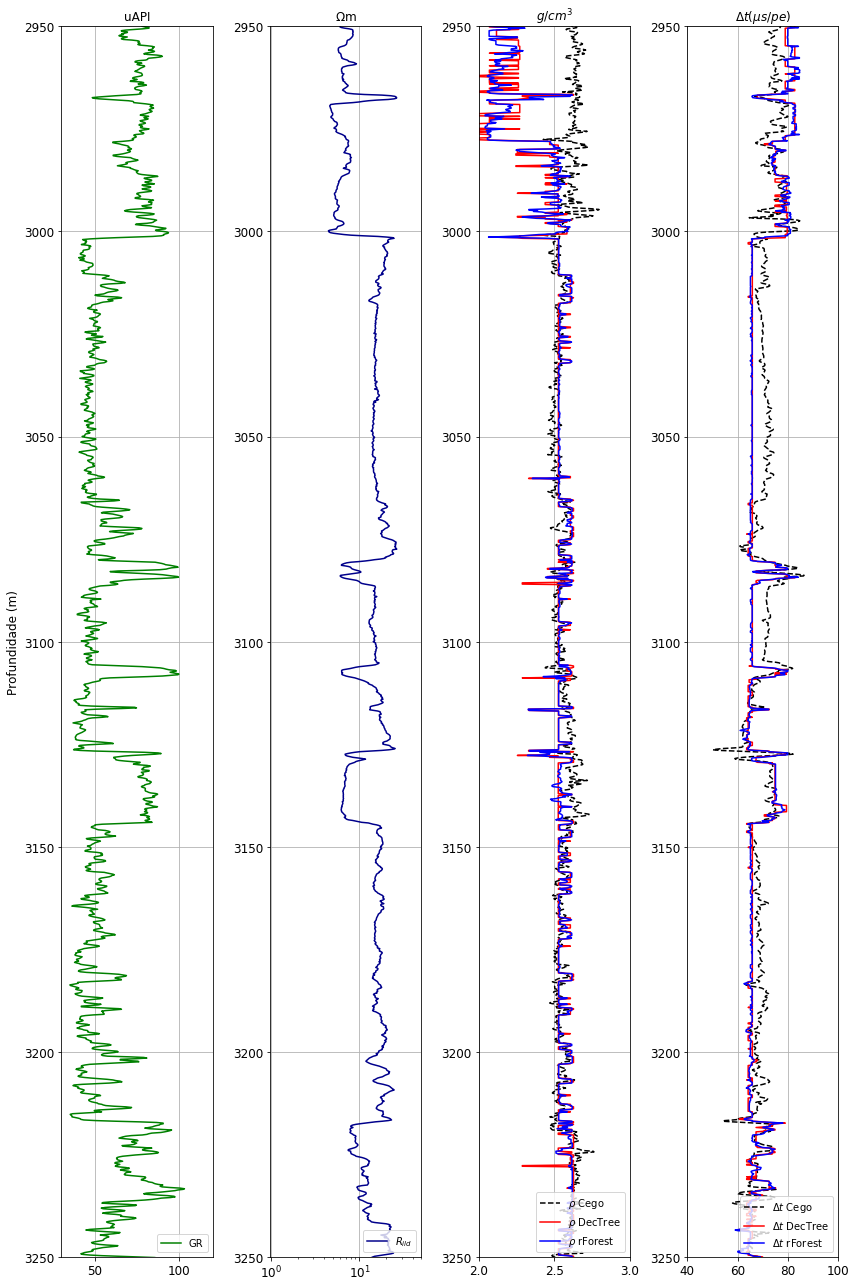

In [11]:
fig, axes = plt.subplots(ncols=4, figsize=(12,18))
#axes2 = axes[2].twiny()

axes[0].plot(blind_test.GR, blind_test.DEPT, c='green', label='GR')
axes[0].set_xlim(30,120)

axes[1].semilogx(blind_test.ILD,blind_test.DEPT, c = 'darkblue', label='$R_{ild}$')
axes[1].set_xlim(0,50)

axes[2].plot(blind_test.RHOB, blind_test.DEPT, c = 'black', label='$\\rho$ Cego', ls='--')
axes[2].plot(blind_test.RHOB_dec_tree,blind_test.DEPT, c='red', label='$\\rho$ DecTree')
axes[2].plot(blind_test.RHOB_r_forest, blind_test.DEPT, c='blue', label='$\\rho$ rForest')
axes[2].set_xlim(2,3)

# axes2.plot(blind_test.NPHI, blind_test.DEPT, c = 'blue', label = 'NPHI', lw = 0.8, ls='--')
# axes2.set_xlim(0,45)
# axes2.legend(loc='upper right')
# axes2.invert_yaxis()

axes[3].plot(blind_test.DT.loc[(blind_test.DT > 0)].values, 
           blind_test.DEPT.loc[(blind_test.DT > 0)].values, c='black', label='$\Delta t$ Cego', ls='--')
axes[3].plot(blind_test.DT_dec_tree.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='red', label='$\Delta t$ DecTree')
axes[3].plot(blind_test.DT_r_forest.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='blue', label='$\Delta t$ rForest')
axes[3].set_xlim(40,100)

axes[0].set_title('uAPI')
axes[1].set_title('$\Omega$m')
#axes2.set_xlabel('$\phi_n$(%)')
axes[2].set_title('$g/cm^3$')
axes[3].set_title('$\Delta t  (\mu s/pe )$')
axes[0].set_ylabel('Profundidade (m)')


for ax in axes:
    ax.set_ylim(2950,3250)
    ax.invert_yaxis()
    ax.grid()
    ax.legend(loc=4)
    
axes[2].legend(loc='lower right')
axes[3].legend(loc='lower right')

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

fig.tight_layout()

In [12]:
blind_test.to_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')
